In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
data = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [85]:
data

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [86]:
data.shape

(107, 2)

In [87]:
# Clean the dataset

In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Perrin Freres monthly champagne sales millions ?64-?72,105.0,4761.152381,2553.502601,1413.0,3113.0,4217.0,5221.0,13916.0


In [89]:
data.columns=['Months','Sales']

In [90]:
data.head(10)

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
5,1964-06,3036.0
6,1964-07,2282.0
7,1964-08,2212.0
8,1964-09,2922.0
9,1964-10,4301.0


In [91]:
data.isnull().sum()

Months    1
Sales     2
dtype: int64

In [92]:
data[data['Sales'].isnull()]

,Months,Sales
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [93]:
data.drop(index=[105,106],inplace=True)

In [94]:
data.isnull().sum()

Months    0
Sales     0
dtype: int64

In [95]:
data

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [96]:
data.dtypes

Months     object
Sales     float64
dtype: object

In [97]:
data["Months"]= pd.to_datetime(data['Months'])

In [98]:
data.dtypes

Months    datetime64[ns]
Sales            float64
dtype: object

In [99]:
data.set_index('Months',inplace=True)

In [100]:
data

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


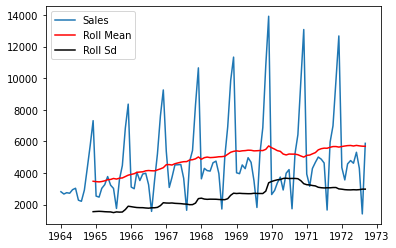

In [101]:
roll_mean = data['Sales'].rolling(12).mean()
roll_sd = data['Sales'].rolling(12).std()
plt.plot(data['Sales'],label='Sales')
plt.plot(roll_mean,color='r', label='Roll Mean')
plt.plot(roll_sd,color='k', label='Roll Sd')
plt.legend()
plt.show()

In [102]:
# Seasonal Decomposition

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

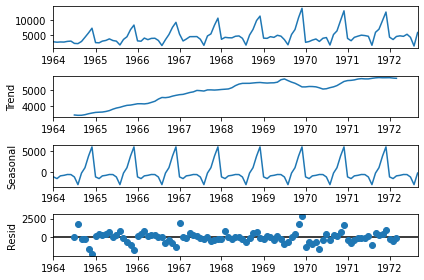

In [104]:
seasonal_decompose(data,model='additive').plot()
plt.show()


In [105]:
# adfuller test (Augmented Dicky-fuller test)

In [106]:
from statsmodels.tsa.stattools import adfuller

In [107]:
# Ho: Data is not stationary
# Ha: Data is stationary

def adfuller_test(data):
    result= adfuller(data)
    labels = ['ADF Statistic','P-Value','#Lags','#Obs']
    for value,label in zip(result,labels):
        print(label+':',str(value))
    if result[1]>0.05:
        print('Accept the Ho: Data is not stationary')
    else:
        print('Accept the Ha: Data is stationary')

In [108]:
adfuller_test(data['Sales'])

ADF Statistic: -1.8335930563276184
P-Value: 0.36391577166024713
#Lags: 11
#Obs: 93
Accept the Ho: Data is not stationary


In [109]:
# Diffrencing

In [110]:
data['Sales']

Months
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, Length: 105, dtype: float64

In [111]:
data['Sales'].shift(1)

Months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [112]:
data['1st Diff']= data['Sales']- data['Sales'].shift(1)

In [113]:
data

,Sales,1st Diff
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
...,...,...
1972-05-01,4618.0,-170.0
1972-06-01,5312.0,694.0
1972-07-01,4298.0,-1014.0


In [114]:
adfuller_test(data['1st Diff'].dropna())

ADF Statistic: -7.18989644805098
P-Value: 2.519620447387365e-10
#Lags: 11
#Obs: 92
Accept the Ha: Data is stationary


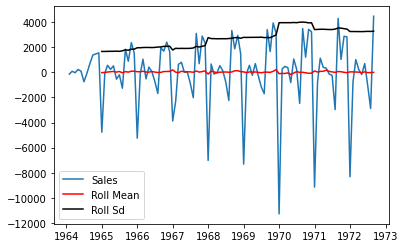

In [115]:
roll_mean = data['1st Diff'].rolling(12).mean()
roll_sd = data['1st Diff'].rolling(12).std()
plt.plot(data['1st Diff'],label='Sales')
plt.plot(roll_mean,color='r', label='Roll Mean')
plt.plot(roll_sd,color='k', label='Roll Sd')
plt.legend()
plt.show()

In [116]:
# Log differencing

In [117]:
data['Log Diff']= np.log(data['Sales']) - np.log(data['Sales'].shift(1))

In [118]:
data

,Sales,1st Diff,Log Diff
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,-0.052135
1964-03-01,2755.0,83.0,0.030590
1964-04-01,2721.0,-34.0,-0.012418
1964-05-01,2946.0,225.0,0.079449
...,...,...,...
1972-05-01,4618.0,-170.0,-0.036151
1972-06-01,5312.0,694.0,0.140007
1972-07-01,4298.0,-1014.0,-0.211819


In [119]:
adfuller_test(data['Log Diff'].dropna())

ADF Statistic: -4.46091446525368
P-Value: 0.0002312140464953152
#Lags: 12
#Obs: 91
Accept the Ha: Data is stationary


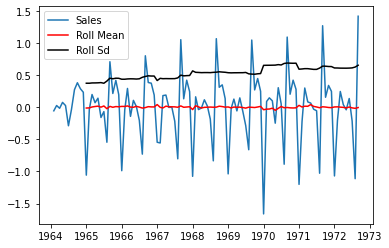

In [120]:
roll_mean = data['Log Diff'].rolling(12).mean()
roll_sd = data['Log Diff'].rolling(12).std()
plt.plot(data['Log Diff'],label='Sales')
plt.plot(roll_mean,color='r', label='Roll Mean')
plt.plot(roll_sd,color='k', label='Roll Sd')
plt.legend()
plt.show()

## Auto Regression

In [121]:
from pandas.plotting import autocorrelation_plot

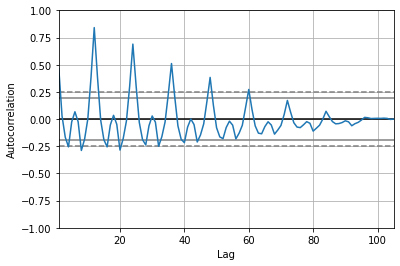

In [122]:
autocorrelation_plot(data['Sales'])
plt.show()

In [123]:
# Plot the ACF and PACF

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

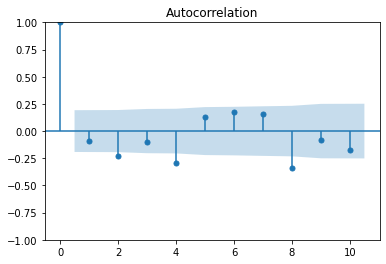

In [125]:
plot_acf(data['1st Diff'].dropna(), lags=10)
plt.show()

In [126]:
# Since the taper in acf model is at 0 lag the the value of q=0

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


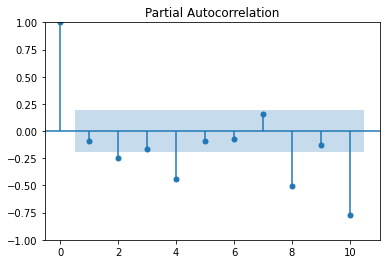

In [127]:
plot_pacf(data['1st Diff'].dropna(), lags=10)
plt.show()

In [128]:
# Since the shut off of pacf model is at 0 lag the the value of p=0 (0,1,0)

In [129]:
from pmdarima import auto_arima
a_arima = auto_arima(data['Sales'], start_p=0, start_q=0,d=1, test='adf', trace=True)
# Akaike information criterion

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1937.732, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1938.874, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1937.889, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1935.750, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.359 seconds


In [130]:
from statsmodels.tsa.arima.model import ARIMA

In [131]:
model = ARIMA(data['Sales'], order=(0,1,0))

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [132]:
model_fit = model.fit()

In [133]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -966.875
Date:                Sun, 03 Jul 2022   AIC                           1935.750
Time:                        12:39:21   BIC                           1938.394
Sample:                    01-01-1964   HQIC                          1936.821
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.895e+06   5.29e+05     13.025      0.000    5.86e+06    7.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):               139.51
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               4.62   Skew:                            -1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [134]:
data['Forecast_ARIMA'] = model_fit.predict(start=90,end=105, dynamic=True)

In [135]:
data.tail(20)

,Sales,1st Diff,Log Diff,Forecast_ARIMA
Months,,,,
1971-02-01,3162.0,-772.0,-0.218452,NaN
1971-03-01,4286.0,1124.0,0.304149,NaN
1971-04-01,4676.0,390.0,0.087089,NaN
1971-05-01,5010.0,334.0,0.068993,NaN
1971-06-01,4874.0,-136.0,-0.027521,NaN
1971-07-01,4633.0,-241.0,-0.050710,4874.0
1971-08-01,1659.0,-2974.0,-1.026990,4874.0
1971-09-01,5951.0,4292.0,1.277344,4874.0
1971-10-01,6981.0,1030.0,0.159633,4874.0


<AxesSubplot:xlabel='Months'>

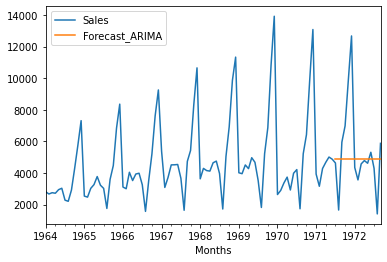

In [136]:
data[['Sales','Forecast_ARIMA']].plot()

In [137]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [138]:
model_sarimax = SARIMAX(data['Sales'], order=(0,1,0), seasonal_order=(0,1,0,12))

C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\CEA\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [139]:
model_fit = model_sarimax.fit()

In [140]:
data['Forecast Sarimax']= model_fit.predict(start=90,end=105, dynamic=True)

In [141]:
data.tail(20)

,Sales,1st Diff,Log Diff,Forecast_ARIMA,Forecast Sarimax
Months,,,,,
1971-02-01,3162.0,-772.0,-0.218452,NaN,NaN
1971-03-01,4286.0,1124.0,0.304149,NaN,NaN
1971-04-01,4676.0,390.0,0.087089,NaN,NaN
1971-05-01,5010.0,334.0,0.068993,NaN,NaN
1971-06-01,4874.0,-136.0,-0.027521,NaN,NaN
1971-07-01,4633.0,-241.0,-0.050710,4874.0,5105.0
1971-08-01,1659.0,-2974.0,-1.026990,4874.0,2626.0
1971-09-01,5951.0,4292.0,1.277344,4874.0,6109.0
1971-10-01,6981.0,1030.0,0.159633,4874.0,7312.0


<AxesSubplot:xlabel='Months'>

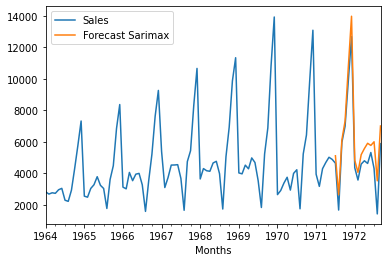

In [142]:
data[['Sales','Forecast Sarimax']].plot()

In [143]:
y_test = data['Sales'][90:]

In [144]:
y_pred = data['Forecast Sarimax'][90:]

In [145]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error

In [146]:
print('R2',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))

R2 0.8630992833358998
MSE 1036097.2
MAPE 0.2614473604773084


In [147]:
## Predictions

In [148]:
from pandas.tseries.offsets import DateOffset

In [149]:
future_dates = [data.index[-1]+ DateOffset(months=x) for x in range(0,36)]

In [150]:
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00'),
 Timestamp('1974-09-01 00:00:00'),
 Timestamp('1974-10-01 00:00:00'),
 Timestamp('1974-11-01 00:00:00'),
 Timestamp('1974-12-01 00:00:00'),
 Timestamp('1975-01-

In [151]:
new_data = pd.DataFrame(index=future_dates[1:], columns=data.columns)

In [152]:
new_data

,Sales,1st Diff,Log Diff,Forecast_ARIMA,Forecast Sarimax
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN,NaN


In [153]:
fin_data = pd.concat([data,new_data])

In [154]:
fin_data.shape

(140, 5)

In [155]:
fin_data['Forecast Sarimax']= model_fit.predict(start=100,end=140, dynamic=True)

In [157]:
fin_data.tail(40)

,Sales,1st Diff,Log Diff,Forecast_ARIMA,Forecast Sarimax
1972-05-01,4618.0,-170.0,-0.036151,4874.0,5122.0
1972-06-01,5312.0,694.0,0.140007,4874.0,4986.0
1972-07-01,4298.0,-1014.0,-0.211819,4874.0,4745.0
1972-08-01,1413.0,-2885.0,-1.112435,4874.0,1771.0
1972-09-01,5877.0,4464.0,1.425331,4874.0,6063.0
1972-10-01,NaN,NaN,NaN,NaN,7093.0
1972-11-01,NaN,NaN,NaN,NaN,9963.0
1972-12-01,NaN,NaN,NaN,NaN,12782.0
1973-01-01,NaN,NaN,NaN,NaN,4460.0
1973-02-01,NaN,NaN,NaN,NaN,3676.0


<AxesSubplot:>

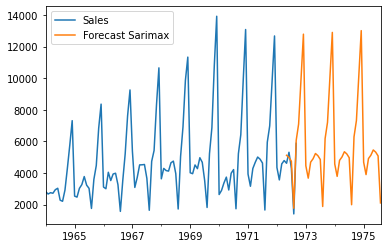

In [158]:
fin_data[['Sales','Forecast Sarimax']].plot()